In [1]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm, trange
from update import test_inference

from mnist_loader import get_dataset
from mnist_model import CNNMnist

In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
NUM_USERS = 100
EPOCHS = 10

# Train

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/mnist/MNIST\raw\train-images-idx3-ubyte.gz to data/mnist/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/mnist/MNIST\raw\train-labels-idx1-ubyte.gz to data/mnist/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to data/mnist/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/mnist/MNIST\raw

CNNMnist(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]


Train loss: 0.9347852751739752


0it [00:00, ?it/s]


Train loss: 0.4097451373839429


0it [00:00, ?it/s]


Train loss: 0.32188318888229855


0it [00:00, ?it/s]


Train loss: 0.2734999108289096


0it [00:00, ?it/s]


Train loss: 0.2487860009995605


0it [00:00, ?it/s]


Train loss: 0.2293219833867128


0it [00:00, ?it/s]


Train loss: 0.21447011054372356


0it [00:00, ?it/s]


Train loss: 0.19942876666005868


0it [00:00, ?it/s]


Train loss: 0.19606642782497508


0it [00:00, ?it/s]


Train loss: 0.18265869616985575


FileNotFoundError: [Errno 2] No such file or directory: 'images/nn_mnist_cnn_10.png'

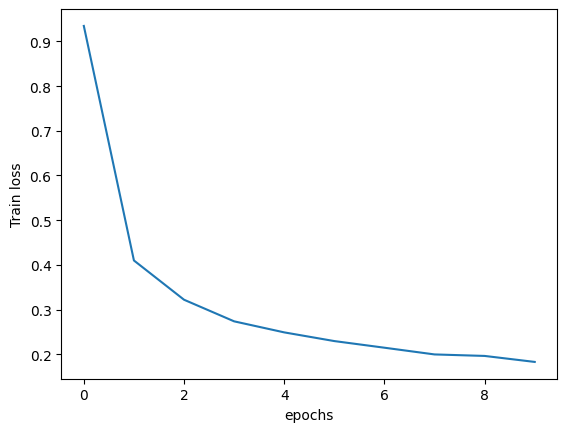

In [3]:
# load datasets
train_dataset, test_dataset, _ = get_dataset(NUM_USERS, True)

global_model = CNNMnist()

# Set the model to train and send it to device.
global_model.to(DEVICE)
global_model.train()
print(global_model)

# Training
# Set optimizer and criterion
optimizer = torch.optim.SGD(global_model.parameters(), lr=0.01, momentum=0.5)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
criterion = torch.nn.NLLLoss().to(DEVICE)
epoch_loss = []

for epoch in trange(EPOCHS):
    batch_loss = []

    for batch_idx, (images, labels) in tqdm(enumerate(trainloader), leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = global_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batch_loss.append(loss.item())

    loss_avg = sum(batch_loss) / len(batch_loss)
    print('\nTrain loss:', loss_avg)
    epoch_loss.append(loss_avg)

# Plot loss
plt.figure()
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.xlabel('epochs')
plt.ylabel('Train loss')
plt.savefig(f'images/nn_mnist_cnn_{EPOCHS}.png')

# Test

In [ ]:
test_acc, test_loss = test_inference(global_model, test_dataset)
print(f'Test on {len(test_dataset)} samples')
print(f'Test Accuracy: {100 * test_acc:.2f}%')